<a href="https://colab.research.google.com/github/Andres-boullosa/AA_PRACTICA2_GRUPO_2/blob/main/AA_PRACTICA2_GRUPO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* GRUPO 2
* Andrés Boullosa García
* Cristina Velasco Almirall

# 0. Introducción

Esta práctica consiste en crear un modelo de Red de Neuronas Convolucionales que sea capaz de reconocer y clasificar imágenes de ropa.

Las imágenes que utilizaremos provienen del conjunto de datos Fashion-MNIST, que contiene datos de las imágenes de Zalando, una página web de moda online alemana. Contiene 70000 imágenes de baja calidad (28x28 píxeles) en escala de grises en 10 categorías, de las cuales 60000 serán imágenes de entrenamiento y 10000 serán imágenes de test.

A lo largo de este documento, definiremos, configuraremos, entrenaremos, evaluaremos y mejoraremos varios modelos que posteriormente utilizaremos para hacer predicciones.

## Preparaciones necesarias

### Librerías

Importamos las librerías que vamos a requerir: TensorFlow y keras. Nos aseguramos de que la versión de TensorFlow sea 2.0.0 o superior. También comprobamos la versión de keras, así como si disponemos de GPU. Como podemos ver, tenemos la versión 2.6.0 tanto de keras como de Tensor Flow, y la GPU está disponible.

In [12]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

# Comprobamos versiones de TF, keras, y si disponemos de GPU
print(tf.keras.__version__)
print(tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

2.7.0
2.7.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Carga y preparación de los datos

Descargamos los datos: un dataset que obtenemos de keras llamado fashion_mnist. Como sabemos, es un conjunto de imágenes de ropa de la marca Zalando. Además de imágenes, este dataset contiene lo que llamamos "labels". Es decir, cada imagen lleva asociada una etiqueta que dice qué es esa imagen (un pantalón, una camiseta...). Descargamos imágenes y labels tanto de entrenamiento como de test.

In [13]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Para ver la forma de los datos, utilizamos la función *shape*. Observamos que tenemos 60000 imagenes de entrenamiento y 10000 de test, todas ellas de 28x28 píxeles.

In [14]:
# Vemos la forma de los datos
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Transformamos los datos a tensores para que se puedan usar como entrada de nuestros futuros modelos. 

In [15]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
train_images.shape

(60000, 28, 28, 1)

In [16]:
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# 1. Construimos y entrenamos los modelos pedidos

In [17]:
# Importamos las librerías necesarias
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization


Construimos y entrenamos los modelos para ver cuál es mejor, y por lo tanto, cuál deberíamos usar. En total son 5, con dos variaciones del modelo1 (el modelo1_2 y el modelo1_t).

## Modelo 1

In [ ]:
# Construimos el modelo
model1 = Sequential()
model1.add(Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2,2)))
model1.add(Conv2D(64, (5,5), activation='relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))

# Compilamos el modelo: utilizamos el optimizador RMSProp y la función de 
# pérdida categorical_crossentropy.
model1.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo
model1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 18s 10ms/step - loss: 1.2983 - accuracy: 0.5910
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.7185 - accuracy: 0.7382
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.6251 - accuracy: 0.7722
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5677 - accuracy: 0.7925
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5311 - accuracy: 0.8087


## Modelo 1_2

In [ ]:
# Construimos el modelo
model1_2 = Sequential()
model1_2.add(Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1)))
model1_2.add(MaxPooling2D((2,2)))
model1_2.add(Conv2D(64, (5,5), activation='relu'))
model1_2.add(MaxPooling2D((2,2)))
model1_2.add(Flatten())
model1_2.add(Dense(10, activation='softmax'))

# Compilamos el modelo: utilizamos el optimizador RMSProp y la función de 
# pérdida categorical_crossentropy.
model1_2.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo
model1_2.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 5s 9ms/step - loss: 1.3000 - accuracy: 0.5776
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 0.7141 - accuracy: 0.7406
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6258 - accuracy: 0.7730
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.5728 - accuracy: 0.7937
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.5346 - accuracy: 0.8071
Epoch 6/25
469/469 [==============================] - 4s 9ms/step - loss: 0.5059 - accuracy: 0.8193
Epoch 7/25
469/469 [==============================] - 4s 8ms/step - loss: 0.4824 - accuracy: 0.8290
Epoch 8/25
469/469 [==============================] - 4s 8ms/step - loss: 0.4632 - accuracy: 0.8353
Epoch 9/25
469/469 [==============================] - 4s 8ms/step - loss: 0.4489 - accuracy: 0.8410
Epoch 10/25
469/469 [==============================] - 4s 8ms/step - loss: 0.4348 - accuracy: 0.8477

## Modelo 1_t

In [ ]:
# Construimos el modelo
model1_t = Sequential()
model1_t.add(Conv2D(32, (5,5), activation='tanh', input_shape=(28, 28, 1)))
model1_t.add(MaxPooling2D((2,2)))
model1_t.add(Conv2D(64, (5,5), activation='tanh'))
model1_t.add(MaxPooling2D((2,2)))
model1_t.add(Flatten())
model1_t.add(Dense(10, activation='softmax'))

# Compilamos el modelo: utilizamos el optimizador RMSProp y la función de 
# pérdida categorical_crossentropy.
model1_t.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo
model1_t.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 1.2170 - accuracy: 0.6123
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.7038 - accuracy: 0.7450
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.6178 - accuracy: 0.7716
Epoch 4/5
469/469 [==============================] - 4s 10ms/step - loss: 0.5686 - accuracy: 0.7901
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5341 - accuracy: 0.8054


## Modelo 2

In [ ]:
# Construimos el modelo2
model2 = Sequential()
model2.add(Conv2D(64, (7,7), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dense(65, activation='relu'))
model2.add(Dense(10, activation='softmax'))

# Compilamos el modelo: utilizamos el optimizador RMSProp y la función de 
# pérdida categorical_crossentropy.
model2.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo
model2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 1.3555 - accuracy: 0.5419
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.7925 - accuracy: 0.7076
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.6994 - accuracy: 0.7387
Epoch 4/5
469/469 [==============================] - 5s 12ms/step - loss: 0.6422 - accuracy: 0.7600
Epoch 5/5
469/469 [==============================] - 5s 12ms/step - loss: 0.6022 - accuracy: 0.7749


## Modelo 3

In [ ]:
model3 = Sequential()
model3.add(Conv2D(64,(7,7), activation='relu', input_shape=(28,28,1)))
model3.add(MaxPooling2D((2,2)))
model3.add(Conv2D(128,(3,3),activation='relu'))
model3.add(MaxPooling2D((2,2)))
model3.add(Flatten())
model3.add(Dense(65, activation='relu'))
model3.add(Dense(10, activation='softmax'))

# Compilamos el modelo: utilizamos el optimizador RMSProp y la función de 
# pérdida categorical_crossentropy.
model3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo
model3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.5820 - accuracy: 0.7881
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3746 - accuracy: 0.8639
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3276 - accuracy: 0.8810
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2933 - accuracy: 0.8924
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2707 - accuracy: 0.8999


# 2. Explicamos la salida de la llamada a summary

Utilizamos la función *summary* para tener un resumen de cada uno de nuestros modelos. El resumen incluye la siguiente información:


1.   Las capas (*layer*) y su orden en el modelo.
2.   La forma del output (*output shape*) y su orden en el modelo.
3.   El número de parámetros (*param*, los pesos que tiene) en cada capa. 
4.   El número total de parámetros (*total params*) en el modelo.


In [ ]:
print('Modelo 1:')
model1.summary()

Modelo 1:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)       

In [ ]:
print('Modelo 2:')
model2.summary()

Modelo 2:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 65)     

In [ ]:
print('Model 3:')
model3.summary()

Model 3:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 65)      



---



1. Vemos que el modelo 1 tiene 6 capas (*layers*): dos Conv2D, dos MaxPooling2D, una Flatten y una Dense. 
El modelo 2 tiene 7 capas: dos Conv 2D, dos MaxPooling2D, una Flatten y dos Dense. 
El modelo 3 también tiene 7 capas, iguales que las del modelo 2.

2. En todos los modelos, las primeras cuatro capas, tienen un *output shape* de (None, x, x, x), siendo x números que varían según la capa. Los primeros dos números son las dimensiones de las imágenes, que se van haciendo más pequeñas debido a la convolución, y el siguiente número es de los filtros. 
Las últimas tres capas (dos en el caso del primer modelo), tienen solamente un número. Esto es debido a que la capa Flatten aplana la capa anterior, por lo que, por ejemplo, pasa de tener forma (None, 4, 4, 64) a (None, 4x4x64), es decir (None, 1024). 
En la última, (None, 10), el 10 sale de las 10 categorías en las que queremos clasificar las imágenes.

3. El número de parámetros sale de la siguiente fórmula: 
(TAMAÑO DE LA VENTANA (nxn) x NÚMERO DE FILTROS QUE ENTRAN + STRIDE) x NÚMERO DE FILTROS NUEVOS. 
En el caso de la primera capa, el número de filtros que entran es 1.  
La capa MaxPooling2D tiene 0 parámetros ya que al ser conocida la operación que realiza (coger el máximo de la ventana) no necesitamos que la red neuronal la aprenda. La capa Flatten cambia la disposición de las capas, por lo que tampoco necesita parámetros.

4. El número total de parámetros del modelo 1 es 62346, y 210901 en el caso del modelo 2 y 3, de los cuales el 100% son entrenables.

# 3. Análisis del model1 frente a model1_2

In [ ]:
print('Modelo 1:')
model1.evaluate(test_images, test_labels)

print('Modelo 1_2:')
model1_2.evaluate(test_images, test_labels)

Modelo 1:
313/313 [==============================] - 2s 4ms/step - loss: 0.5339 - accuracy: 0.8104
Modelo 1_2:
313/313 [==============================] - 2s 4ms/step - loss: 0.3746 - accuracy: 0.8678


[0.3745921850204468, 0.8677999973297119]

Al enfrentar los modelos 1 y 1_2 con las imágenes de test, podemos ver que el modelo1 tiene una pérdida (*loss*) de 0.55 y una precisión (*accuracy*) de 0.8.

Sin embargo, el modelo1_2 tiene una pérdida menor, de 0.41 y una precisión mayor, de 0.856. 

Observamos que al aumentar el número de épocas (*epoch*) de 5 a 25, el modelo mejora bastante sin sufrir sobreentrenamiento. 

#4. Análisis del model1 frente a model1_t

In [ ]:
print('Modelo 1:')
model1.evaluate(test_images, test_labels)

print('Modelo 1_t:')
model1_t.evaluate(test_images, test_labels)

Modelo 1:
313/313 [==============================] - 1s 4ms/step - loss: 0.5339 - accuracy: 0.8104
Modelo 1_t:
313/313 [==============================] - 2s 5ms/step - loss: 0.5410 - accuracy: 0.8033


[0.5409786105155945, 0.8033000230789185]

Sin embargo, al comparar el modelo1 con el modelo1_t, vemos que sus pérdidas (*loss*) no son muy diferentes (ambas están alrededor de 0.55) y su precisión (*accuracy*) tampoco (ambas alrededor de 0.8). 

Es decir, cambiar la función de activación de las dos capas convolucionales de *ReLU* a *tanh* manteniendo el número de épocas (*epoch*), no ha hecho que el modelo mejore. 

#5. Evaluación de los 3 modelos comparando el rendimiento en los datos de prueba

In [ ]:
print('Modelo 1:')
model1.evaluate(test_images, test_labels)

print('Modelo 2:')
model2.evaluate(test_images, test_labels)

print('Modelo 3:')
model3.evaluate(test_images, test_labels)

Modelo 1:
313/313 [==============================] - 1s 4ms/step - loss: 0.5339 - accuracy: 0.8104
Modelo 2:
313/313 [==============================] - 2s 5ms/step - loss: 0.5984 - accuracy: 0.7759
Modelo 3:
313/313 [==============================] - 2s 5ms/step - loss: 0.3174 - accuracy: 0.8859


[0.317363977432251, 0.8859000205993652]

Al evaluar los modelos 1, 2 y 3 con los datos de prueba, podemos observar que el modelo 1 y 2 obtienen valores de pérdida (*loss*) y precisión (*accuracy*) muy similares, alrededor de 0.55 y 0.8 respectivamente. 

Sin embargo, el modelo 3 reduce notablemente la pérdida, pasando de 0.5 en los modelos 1 y 2 a 0.3 en el modelo 3. La precisión también sube, de 0.8 a 0.88.

Habiendo analizado los resultados, podemos concluir que el modelo 3 se comporta mejor que los modelos 1 y 2 al evaluarlos con los datos de prueba. 

#6. Predicciones de los 3 modelos en la imagen 6 del conjunto de prueba

Predecimos y imprimimos la 6ª imagen para todos los modelos.

In [ ]:
# Importamos numpy para poder usar argmax
import numpy as np

# Obtenemos las predicciones para los modelos
predictions1 = model1.predict(test_images)
predictions2 = model2.predict(test_images)
predictions3 = model3.predict(test_images)
print('Predición modelo 1:',np.argmax(predictions1[5]))

print('Predición modelo 2:',np.argmax(predictions2[5]))

print('Predición modelo 3:',np.argmax(predictions3[5]))

Predición modelo 1: 1
Predición modelo 2: 1
Predición modelo 3: 1


Podemos ver que los tres modelos coinciden que la imagen número 6 es la prenda número 1 (pantalones). Todos aciertan.

#7. Graficamos las primeras 14 imagenes para los 3 modelos

Creamos un vector llamado *class_names* con los nombres de cada clase, es decir, los nombres de las categorías en las que podemos clasificar las prendas de las imágenes.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Funciones necesarias para graficación

In [ ]:
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

 ## Graficación del comportamiento de los modelos



Modelo 1:


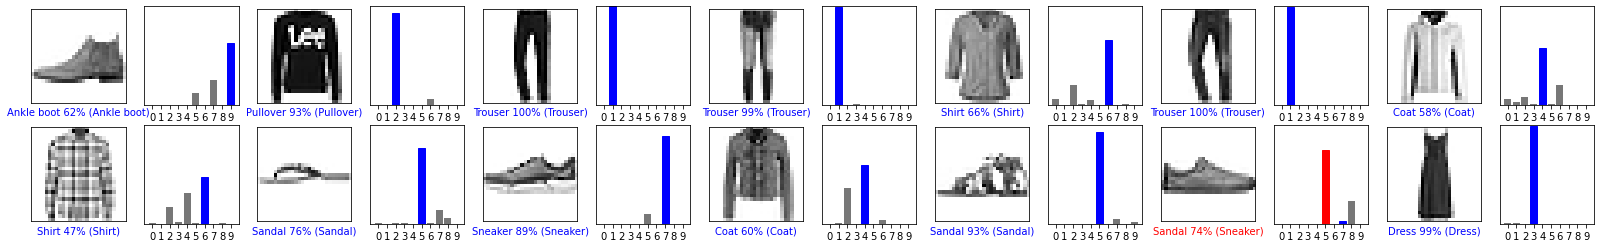


Modelo 2:


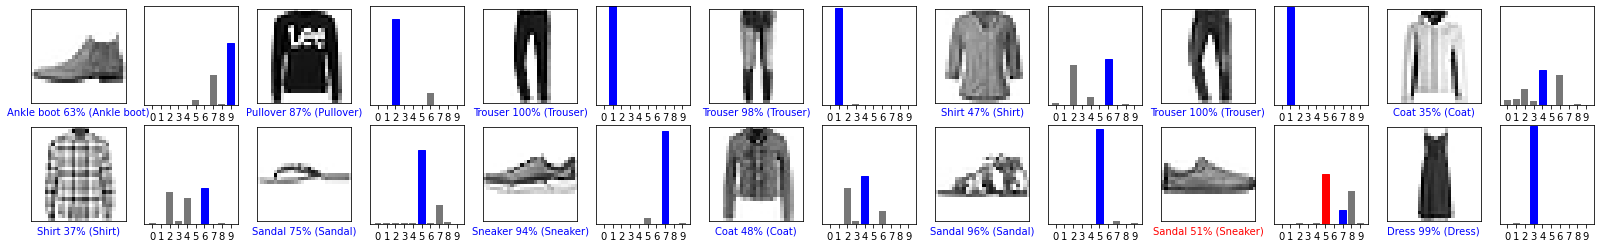


Modelo 3:


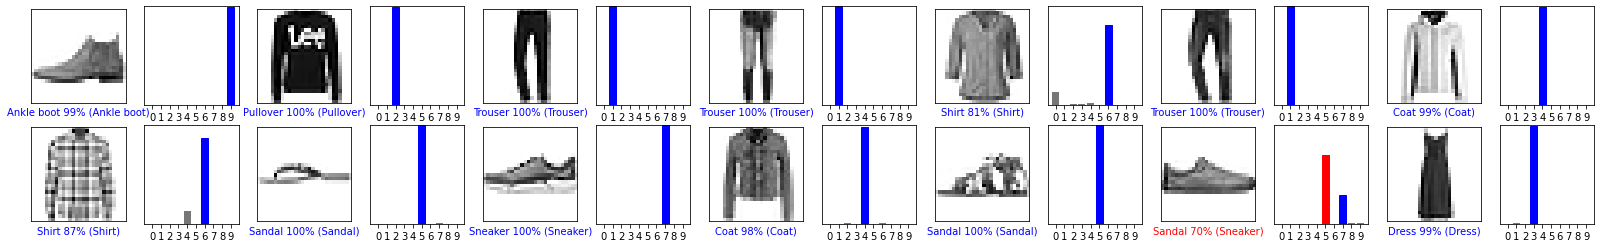

In [ ]:
# Iniciamos el tamaño de la matriz para imprimir
num_rows = 2
num_cols = 7
num_images = num_rows*num_cols

# Cambiamos los datos para que tengan la forma necesaria
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Graficamos el comportamiento del modelo 1
print("\nModelo 1:")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions1, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions1, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 2
print("\nModelo 2:")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions2, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions2, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 3
print("\nModelo 3:")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions3, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions3, test_labels)
plt.show()

Los modelos 1 y 3, predicen correctamente 13 de las 14 imágenes, mientras que el modelo 2, predice bien 12 de 14. 

Los tres fallan con la imagen de una zapatilla (*sneaker*), a la que confunden con una sandalia o, en el caso del modelo 2, con una bolsa (*bag*). El modelo 2 también falla en un abrigo (*coat*), que confunde con una camisa (*shirt*).

Por lo general, los modelos se comportan de forma correcta con las 14 imágenes seleccionadas, acertando aproximadamente el 90% de las veces. 

#8. Comparativa con resultados de la Práctica 1

Para poder comparar con propiedad, recordemos las conclusiones obtenidas en la Práctica 1:

Construimos 8 modelos y dos variaciones. El mejor modelo tenía una precisión del 87% y una pérdida de 0.36.

Como es lógico, nuestros modelos bajaron la precisión al enfrentarlos con las imagenes de test, equivocándose sobretodo en prendas similares.

El mejorar el modelo con la función de optimización *adam* y la función de *pérdida sparse_categorical_crossentropy*, nos permitió obtener unos resultados y valores de precisión y pérdida mejores, destacando sobretodo que no variaban del entrenamiento al testado. 


---


En la Práctica 2, el mejor modelo, el modelo 3, tiene una precisión del 89% y 
una pérdida de 0.29, valores similares aunque ligeramente mejores a los de la primera práctica.

Sin embargo, podemos observar que los tres modelos tienen la precisión alrededor del 80% y la pérdida alrededor de 0.55. Todos los modelos se comportan bien, y en todos hemos obtenido buenos resultados, a diferencia de la práctica anterior, en la que teníamos modelos con valores de pérdida y precisión que podían ser muy diferentes entre sí.

Los modelos de esta práctica también se confunden con prendas similares, como hemos podido observar, confundiendo *sneaker* con *sandal* o *coat* con *shirt*.

#9. BatchNormalization y Dropout

Como ya hemos visto anteriormente en clase, las redes neuronales funcionan de mejor manera cuando los datos de los que disponen están en una escala similar. **Batch normalization** no consiste solo en normalizar los datos antes de entrenar los modelos, sino también en hacerlo con las mismas salidas de las funciones. 

Usualmente, esto permite a las redes neuronales encontrar los patrones más rapido y no quedarse atascadas en ciertos mínimos. Es decir, cuando se utilizan estas capas las redes necesitarán menos épocas para entrenarse. También podrían mejorar las predicciones, aunque no es tan común a menos que los datos sean muy dispersos.

La técnica de **Dropout** consiste en "bloquear" un numero aleatorio de neuronas de una capa en cada iteración con el fin de hacer más complicado a la red neuronal el aprender patrones concretos para los datos con los que esta siendo entrenada. Esto consigue que la red se centre en patrones más generales, reduciendo las posibilidades de sobreentrenamiento y por lo tanto generalizando mejor para otros datos.


---



A continuación, construiremos el modelo 3 añadiendo estas capas para ver si realmente se aprecian mejoras:

In [34]:
# Esta variable es un callback los cuales explicaremos en el siguiente punto
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

partial_x_train = train_images[:50000]
x_val = train_images[50000:]

partial_y_train = train_labels[:50000]
y_val = train_labels[50000:]

model3_2 = Sequential()
model3_2.add(Conv2D(64,(7,7), activation='relu', input_shape=(28,28,1)))
model3_2.add(MaxPooling2D((2,2)))
model3_2.add(Dropout(0.3))
model3_2.add(BatchNormalization())
model3_2.add(Conv2D(128,(3,3),activation='relu'))
model3_2.add(MaxPooling2D((2,2)))
model3_2.add(Dropout(0.3))
model3_2.add(BatchNormalization())
model3_2.add(Flatten())
model3_2.add(Dense(128, activation='relu'))
model3_2.add(Dropout(0.3))
model3_2.add(BatchNormalization())
model3_2.add(Dense(10, activation='softmax'))

# Compilamos el modelo: utilizamos el optimizador RMSProp y la función de 
# pérdida categorical_crossentropy.
model3_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo
model3_2.fit(partial_x_train, partial_y_train, 
    validation_data=(x_val, y_val),
    batch_size=128,
    epochs=100,
    callbacks=[early_stopping]
    )

Epoch 1/100
391/391 [==============================] - 7s 14ms/step - loss: 0.5805 - accuracy: 0.7885 - val_loss: 1.3459 - val_accuracy: 0.4981
Epoch 2/100
391/391 [==============================] - 5s 13ms/step - loss: 0.3967 - accuracy: 0.8521 - val_loss: 0.4085 - val_accuracy: 0.8441
Epoch 3/100
391/391 [==============================] - 5s 13ms/step - loss: 0.3526 - accuracy: 0.8696 - val_loss: 0.3275 - val_accuracy: 0.8744
Epoch 4/100
391/391 [==============================] - 5s 14ms/step - loss: 0.3289 - accuracy: 0.8789 - val_loss: 0.3317 - val_accuracy: 0.8735
Epoch 5/100
391/391 [==============================] - 5s 14ms/step - loss: 0.3091 - accuracy: 0.8848 - val_loss: 0.3361 - val_accuracy: 0.8697
Epoch 6/100
391/391 [==============================] - 5s 14ms/step - loss: 0.2950 - accuracy: 0.8904 - val_loss: 0.3007 - val_accuracy: 0.8905
Epoch 7/100
391/391 [==============================] - 5s 13ms/step - loss: 0.2837 - accuracy: 0.8938 - val_loss: 0.3065 - val_accuracy:

In [35]:
#como la paciencia es 10 y ha entrenado 25 epocas la perdida minima en validacion ha sucedido en la epoca 15
model3_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model3_2.fit(train_images, train_labels, 
    batch_size=128,
    epochs=15
    )

model3_2.evaluate(test_images, test_labels)

Epoch 1/15
469/469 [==============================] - 7s 13ms/step - loss: 0.2354 - accuracy: 0.9118
Epoch 2/15
469/469 [==============================] - 6s 12ms/step - loss: 0.2297 - accuracy: 0.9128
Epoch 3/15
469/469 [==============================] - 6s 12ms/step - loss: 0.2268 - accuracy: 0.9140
Epoch 4/15
469/469 [==============================] - 6s 12ms/step - loss: 0.2176 - accuracy: 0.9180
Epoch 5/15
469/469 [==============================] - 6s 12ms/step - loss: 0.2138 - accuracy: 0.9201
Epoch 6/15
469/469 [==============================] - 6s 12ms/step - loss: 0.2127 - accuracy: 0.9193
Epoch 7/15
469/469 [==============================] - 6s 12ms/step - loss: 0.2070 - accuracy: 0.9231
Epoch 8/15
469/469 [==============================] - 6s 12ms/step - loss: 0.2064 - accuracy: 0.9215
Epoch 9/15
469/469 [==============================] - 6s 12ms/step - loss: 0.2048 - accuracy: 0.9214
Epoch 10/15
469/469 [==============================] - 6s 13ms/step - loss: 0.1974 - accura

[0.232434943318367, 0.9157999753952026]

Como podemos ver, la precisión (*accuracy*) ha llegado a 92% en comparación al 88% obtenido en los modelos anteriores. Podemos decir entonces que el uso de estas capas ha cumplido su objetivo.

#10. Callbacks


Los ***callbacks*** son son objetos de python que nos permiten realizar acciones dentro de las distintas etapas de el entrenamiento de una red neuronal. Pueden ser usados de múltiples formas. Entre ellas está guardar el modelo en el disco duro de manera periódica y ver el interior del modelo durante el entrenamiento. Pero, una de las más interesantes, que hemos utilizado en el apartado anterior, es *early stoping*. Esta función es usada para, de manera rápida, buscar el punto en que nuestro modelo deja de aprender y así poder evitar el *overfitting* y *underfitting*.

# 11. Conclusiones


La Práctica 2 nos ha resultado más sencilla tras haber realizado la Práctica 1. Hemos aprendido sobre la implementación de las Redes de Neuronas Convolucionales con un ejemplo que ya conocíamos, lo que nos ha facilitado muchas cosas.

El haber trabajado con tres modelos y dos variaciones, nos ha permitido centrarnos más en cada modelo. La práctica ha sido similar a la anterior, pero al trabajar con Redes de Neuronas Convolucionales, hemos tenido que aprender a interpretar las cosas de manera adecuada.

Por ejemplo, la función *summary* ya sabíamos utilizarla, pero los valores y la interpretación que les teníamos que dar eran diferentes. 

Las variaciones del modelo 1 nos han resultado interesantes, ya que hemos observado una mejora en el modelo 1_2 al cambiar el número de épocas, y ningún cambio en el modelo 1_t a pesar de haber cambiado la función de activación.

En los datos de prueba, los tres modelos se comportan adecuadamente. Al evaluar la sexta imagen, todos aciertan. 

Cuando enfrentamos a nuestros modelos a las 14 primeras imágenes de los datos de prueba, vemos que todos obtienen relativamente buenos resultados, y que, igual que en la práctica anterior, se pueden confundir con prendas similares.

Comparar ambas prácticas nos ha permitido aprender sobre el uso de Redes Convolucionales, y ver la diferencia entre unos resultados y otros.

Por último, hemos aprendido qué son el *batch normalization*, la técnica de *dropout* y los *callbacks*, y cómo influyen al aplicarlos al modelo. *Dropout* nos ha permitido reducir el sobreentrenamiento para poder entrenar más el modelo, *batch normalization* ha permitido que el modelo converja de manera más rápida para no aumentar tanto el coste al entrenarlo más, y los *callbacks* nos han permitido determinar cuántas épocas debemos entrenar al modelo de manera mucho más simple y rápida que con la tecnica que usabamos antes. Esto es debido a que finaliza el entrenamiento mucho antes y no hace falta observar la gráfica para determinar las épocas óptimas.


---

Al igual que en la práctica anterior, para llevar a cabo estre proyecto hemos trabajado de manera conjunta. Solemos realizar trabajos juntos, por lo que estamos acostumbrados a que haya buena comunicación, siendo capaces de poder dividirnos el trabajo y aún así poder participar ambos en todas sus partes.

Principalmente, Andrés Boullosa ha desarrollado el código, mientras que Cristina Velasco se ha centrado más en la parte de la memoria.

Ambos nos hemos involucrado en las dos cosas, y ambos hemos realizado trabajo de investigación sobre los distintos temas requeridos (desde funciones específicas para el código hasta la correcta utilización de Markdown para una presentación adecuada), y ambos hemos revisado y entendido todas las partes, corrigiendo errores y realizando mejoras.

## Bibliografía

Además del [manual de Markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb) sugerido y los apuntes, documentos... etc. vistos en clase, hemos consultado las siguientes páginas webs:

[1] Freire, E., Silva, S. (23/11/2019). *Intro a las redes neuronales convolucionales*. Recuperado de https://bootcampai.medium.com/redes-neuronales-convolucionales-5e0ce960caf8 

[2] Keras. (). *Flatten layer*. Recuperado de https://keras.io/api/layers/reshaping_layers/flatten/

[3] Holbrook, R. (). *Dropout and Batch Normalization*. Recuperado de https://www.kaggle.com/ryanholbrook/dropout-and-batch-normalization 

[4] Holbrook, R. (). *Overfitting and Underfitting*. Recuperado de https://www.kaggle.com/ryanholbrook/overfitting-and-underfitting

[5] TensorFlow. (). *Module: tf.keras.callbacks*. Recuperado de https://www.tensorflow.org/api_docs/python/tf/keras/callbacks

[6] Kaggle. Intro to Deep Learning. Recuperado de https://www.kaggle.com/learn/intro-to-deep-learning 